In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [60]:
# loads the dataset
Autos= pd.read_csv("autos (1).csv")
Autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [61]:
#making a copy of the original data
Autos1 = Autos.copy()
Autos1

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [62]:
#Finding duplicate rows and removing them
Autos1[Autos1.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [63]:
Autos2= Autos1.drop_duplicates().reset_index(drop=True)
Autos2

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371520,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371521,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371522,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [64]:
Autos2.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,371524.0,371524.00000
mean,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,0.0,50820.49427
std,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,0.0,25799.08841
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [65]:
Autos2['seller'].value_counts()

privat        371521
gewerblich         3
Name: seller, dtype: int64

In [66]:
# As 99% of the data belongs to one category, the seller column will not affect the analysis. Hence, selller column can be removed

In [67]:
Autos2['abtest'].value_counts()

test       192583
control    178941
Name: abtest, dtype: int64

In [68]:
#dropping insignificant columns
Autos3 = Autos2.drop(['dateCrawled','name','seller','offerType','monthOfRegistration','dateCreated','nrOfPictures','postalCode','lastSeen'], axis=1)
Autos3

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371520,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371521,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371522,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


In [69]:
#renaming the columns
Autos4= Autos3.rename({'vehicleType':'vehicle_type','yearOfRegistration':'year_reg','powerPS':'power_ps','fuelType':'fuel_type','notRepairedDamage':'repaired'},axis=1)
Autos4

,price,abtest,vehicle_type,year_reg,gearbox,power_ps,model,kilometer,fuel_type,brand,repaired
0,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371520,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371521,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371522,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


In [70]:
Autos4.dtypes

price            int64
abtest          object
vehicle_type    object
year_reg         int64
gearbox         object
power_ps         int64
model           object
kilometer        int64
fuel_type       object
brand           object
repaired        object
dtype: object

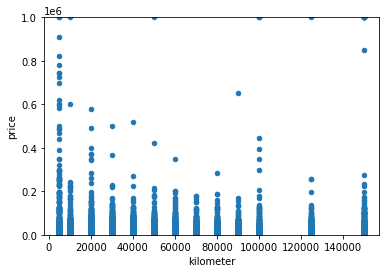

In [71]:
# Scatter plot kilometer / Price
attrib = 'kilometer'
data = pd.concat([Autos4['price'], Autos4[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,1000000));


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


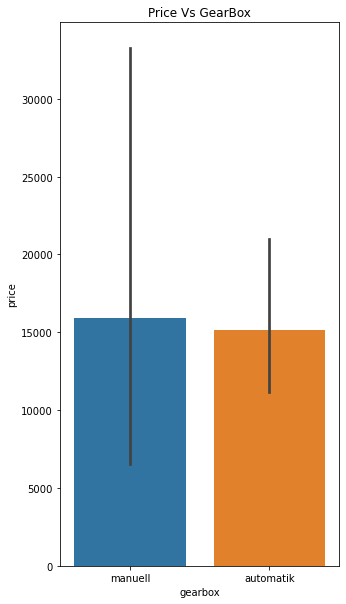

In [72]:
#price of manual cars is higher than automatic cars
plt.figure(figsize=[5,10])
sns.barplot(Autos4['gearbox'],Autos4['price'])
plt.title('Price Vs GearBox')
plt.show()


In [73]:
#price variation due to brand of the car
Autos_brand = Autos4.groupby(['brand']).mean()
Autos_brand 

,price,year_reg,power_ps,kilometer
brand,,,,
alfa_romeo,35737.169723,2001.773987,142.457143,128842.217484
audi,15868.514221,2004.328568,156.454689,129717.397256
bmw,14844.144883,2004.973680,165.073646,132763.569549
chevrolet,7447.764228,2011.260163,130.133875,100116.531165
chrysler,3916.025482,2001.146694,156.785124,134084.022039
citroen,8880.624855,2005.705326,89.403126,120512.350444
dacia,5839.654444,2010.454444,82.130000,86427.777778
daewoo,1017.811808,2002.996310,70.566421,123376.383764
daihatsu,1693.656328,2002.883375,55.411911,119044.665012


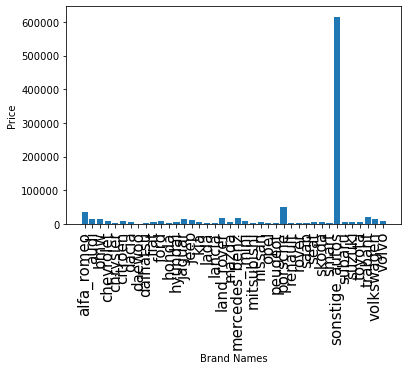

In [74]:
Car_brand = [Car_brand for Car_brand, df in Autos4.groupby('brand')]
plt.bar(Car_brand,Autos_brand['price'])
plt.xticks(Car_brand, rotation = 'vertical', size=15)
plt.xlabel('Brand Names')
plt.ylabel('Price')
plt.show()

In [75]:
# list of car brands with highest to lowest price
#brand porsche has the highest avg price
pricey_brand= Autos_brand['price'].sort_values(ascending=False)
pricey_brand

brand
sonstige_autos    615647.624309
porsche            51089.857336
alfa_romeo         35737.169723
trabant            20415.935702
mercedes_benz      17244.853202
land_rover         16707.559740
audi               15868.514221
bmw                14844.144883
volkswagen         14533.653398
jaguar             14228.083736
jeep               12009.677819
mini                9846.432233
citroen             8880.624855
volvo               8774.005110
ford                8462.054706
chevrolet           7447.764228
skoda               6411.183478
dacia               5839.654444
mazda               5680.361194
kia                 5656.574168
hyundai             5415.057049
fiat                5326.312836
toyota              5232.657009
nissan              4527.510820
suzuki              4373.132359
seat                4356.666050
subaru              4248.948652
chrysler            3916.025482
saab                3820.041509
honda               3804.630113
smart               3531.562012
mi

In [76]:
#price variation due to type of the car i.e. vehicle type
Autos_type = Autos4.groupby('vehicle_type').mean()
Autos_type 

,price,year_reg,power_ps,kilometer
vehicle_type,,,,
andere,677328.957700,1998.681859,102.122729,121493.893357
bus,10302.742956,2004.180656,113.575743,128991.258568
cabrio,15066.444013,2001.553192,145.174775,112486.680059
coupe,25964.071214,2000.525062,172.980908,121872.140115
kleinwagen,5694.287796,2002.321787,68.760391,119239.709080
kombi,7741.302399,2003.618327,136.407146,135856.607907
limousine,11116.186404,2001.876144,132.283761,128226.374956
suv,13242.822397,2005.427755,166.006392,112836.404433


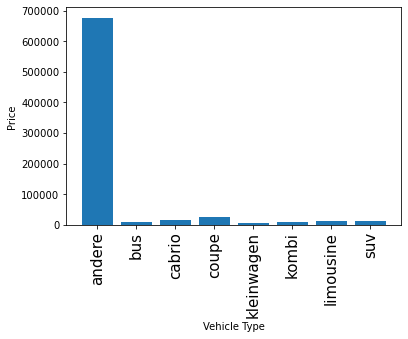

In [77]:
Car_type = [Car_type for Car_type, df in Autos4.groupby('vehicle_type')]
plt.bar(Car_type,Autos_type['price'])
plt.xticks(Car_type, rotation = 'vertical', size=15)
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.show()

In [78]:
# list of car types with highest to lowest price
pricey_vehicle_type= Autos_type['price'].sort_values(ascending=False)
pricey_vehicle_type

vehicle_type
andere        677328.957700
coupe          25964.071214
cabrio         15066.444013
suv            13242.822397
limousine      11116.186404
bus            10302.742956
kombi           7741.302399
kleinwagen      5694.287796
Name: price, dtype: float64

In [79]:
## coupe vehicle type has the highest price

In [80]:
#outlier detection for numerical data
num_columns = Autos4.select_dtypes(exclude='object').columns.tolist()

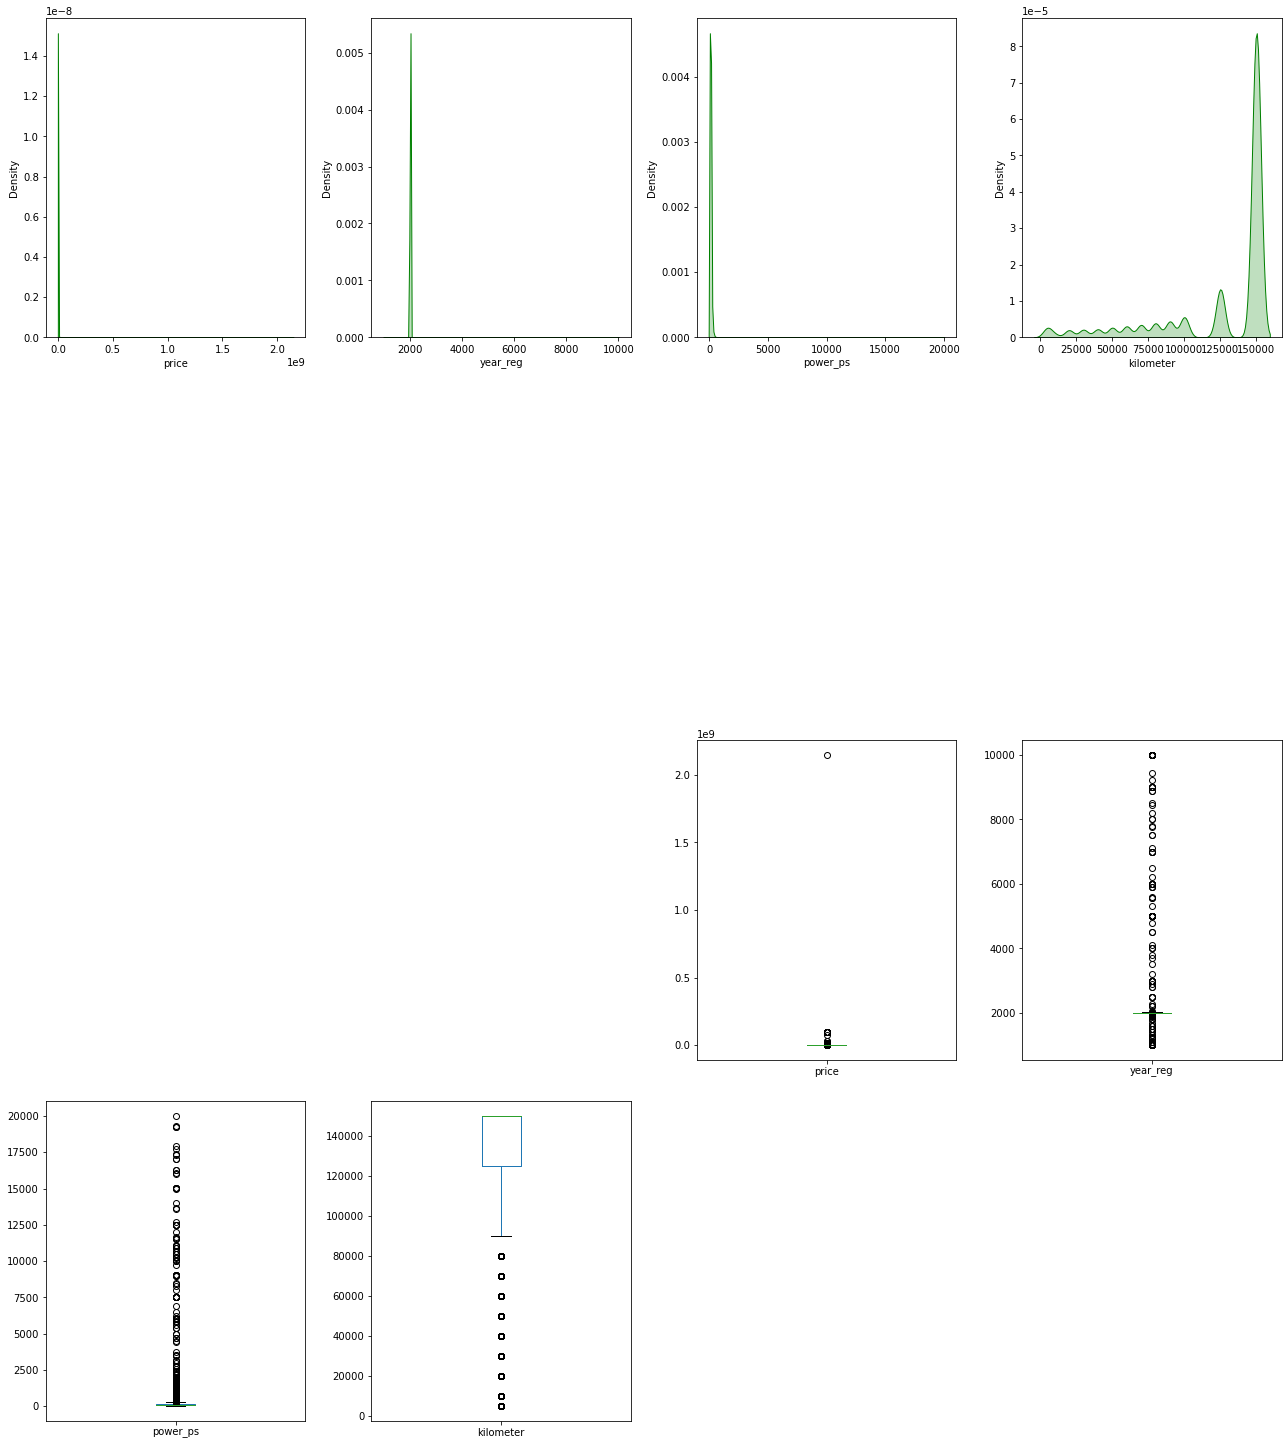

In [81]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(Autos4[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    Autos4[col].plot.box()
plt.tight_layout() 
plt.show()
 

In [82]:
#Descriptive stat
Autos4['price'].describe()

count    3.715240e+05
mean     1.729530e+04
std      3.587973e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [83]:
#Descriptive stat
Autos4['power_ps'].describe() 

count    371524.000000
mean        115.549039
std         192.140488
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: power_ps, dtype: float64

In [84]:
#Descriptive stat
Autos4['year_reg'].describe() 

count    371524.000000
mean       2004.578033
std          92.867097
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: year_reg, dtype: float64

In [85]:
#Descriptive stat
Autos4['kilometer'].describe() 

count    371524.000000
mean     125618.842928
std       40112.138811
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [86]:
Autos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371524 entries, 0 to 371523
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         371524 non-null  int64 
 1   abtest        371524 non-null  object
 2   vehicle_type  333655 non-null  object
 3   year_reg      371524 non-null  int64 
 4   gearbox       351315 non-null  object
 5   power_ps      371524 non-null  int64 
 6   model         351040 non-null  object
 7   kilometer     371524 non-null  int64 
 8   fuel_type     338138 non-null  object
 9   brand         371524 non-null  object
 10  repaired      299464 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.2+ MB


In [87]:
#check for missing values
Autos4.isna().sum()

price               0
abtest              0
vehicle_type    37869
year_reg            0
gearbox         20209
power_ps            0
model           20484
kilometer           0
fuel_type       33386
brand               0
repaired        72060
dtype: int64

In [88]:
import seaborn as sns
cols = Autos4.columns 
cols

Index(['price', 'abtest', 'vehicle_type', 'year_reg', 'gearbox', 'power_ps',
       'model', 'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')

<AxesSubplot:>

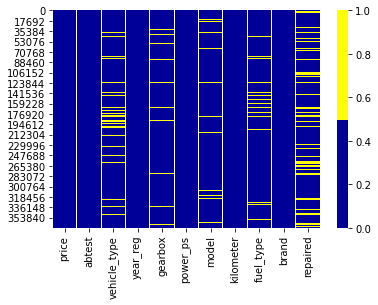

In [89]:
#heatmap  for finding missing values
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(Autos4[cols].isnull(),
            cmap=sns.color_palette(colours)) 

In [90]:
#Missing value imputation for categorical vlaue
Autos4['vehicle_type'].fillna('Other', inplace = True)
Autos4['gearbox'].fillna('Other', inplace = True)
Autos4['model'].fillna('Other', inplace = True)
Autos4['fuel_type'].fillna('Other', inplace = True)
Autos4['repaired'].fillna('Other', inplace = True)


In [91]:
Autos4

,price,abtest,vehicle_type,year_reg,gearbox,power_ps,model,kilometer,fuel_type,brand,repaired
0,480,test,Other,1993,manuell,0,golf,150000,benzin,volkswagen,Other
1,18300,test,coupe,2011,manuell,190,Other,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,Other
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,test,Other,2005,Other,0,Other,20000,Other,sonstige_autos,Other
371520,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371521,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371522,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,Other


In [92]:
#null values has been removed, now its a clean data
Autos4.isna().sum() 

price           0
abtest          0
vehicle_type    0
year_reg        0
gearbox         0
power_ps        0
model           0
kilometer       0
fuel_type       0
brand           0
repaired        0
dtype: int64

In [93]:
# replacing nein and ja with yes and no respectively
replace_values = {"nein" : "No", "ja" : "Yes"}
Autos4 = Autos4.replace({"repaired" : replace_values})
replace_values1 = {"andere" : "Other"}
Autos4 = Autos4.replace({"vehicle_type" : replace_values1})
replace_values2 = {"andere" : "Other"}
Autos4 = Autos4.replace({"fuel_type" : replace_values2})
Autos4

,price,abtest,vehicle_type,year_reg,gearbox,power_ps,model,kilometer,fuel_type,brand,repaired
0,480,test,Other,1993,manuell,0,golf,150000,benzin,volkswagen,Other
1,18300,test,coupe,2011,manuell,190,Other,125000,diesel,audi,Yes
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,Other
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,No
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,No
...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,test,Other,2005,Other,0,Other,20000,Other,sonstige_autos,Other
371520,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,No
371521,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,No
371522,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,Other


In [94]:
#creating dummy variables
#converting object type data into numerical value using hot label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Autos4['abtest']= label_encoder.fit_transform(Autos4['abtest']) 
Autos4['repaired']= label_encoder.fit_transform(Autos4['repaired'])
Autos4

,price,abtest,vehicle_type,year_reg,gearbox,power_ps,model,kilometer,fuel_type,brand,repaired
0,480,1,Other,1993,manuell,0,golf,150000,benzin,volkswagen,1
1,18300,1,coupe,2011,manuell,190,Other,125000,diesel,audi,2
2,9800,1,suv,2004,automatik,163,grand,125000,diesel,jeep,1
3,1500,1,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,0
4,3600,1,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,0
...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,1,Other,2005,Other,0,Other,20000,Other,sonstige_autos,1
371520,1199,1,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,0
371521,9200,1,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,0
371522,3400,1,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,1


In [95]:
#using one hot encoder
Autos5 = pd.get_dummies(Autos4, columns = ['vehicle_type','gearbox','fuel_type']) 

In [96]:
Autos5

,price,abtest,year_reg,power_ps,model,kilometer,brand,repaired,vehicle_type_Other,vehicle_type_bus,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
0,480,1,1993,0,golf,150000,volkswagen,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,18300,1,2011,190,Other,125000,audi,2,0,0,...,0,0,1,0,0,0,1,0,0,0
2,9800,1,2004,163,grand,125000,jeep,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1500,1,2001,75,golf,150000,volkswagen,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,3600,1,2008,69,fabia,90000,skoda,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,2200,1,2005,0,Other,20000,sonstige_autos,1,1,0,...,1,0,0,1,0,0,0,0,0,0
371520,1199,1,2000,101,fortwo,125000,smart,0,0,0,...,0,1,0,0,1,0,0,0,0,0
371521,9200,1,1996,102,transporter,150000,volkswagen,0,0,1,...,0,0,1,0,0,0,1,0,0,0
371522,3400,1,2002,100,golf,150000,volkswagen,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [97]:
#Removing very high  values from price column
 
Autos5.drop(Autos5[(Autos5['price'] >=1000000)].index, inplace=True)


In [98]:
#Removing 0 values from power column
Autos5.drop(Autos5[(Autos5['power_ps'] >=0) & (Autos5['power_ps'] <= 10)].index, inplace=True)

In [99]:
Autos5

,price,abtest,year_reg,power_ps,model,kilometer,brand,repaired,vehicle_type_Other,vehicle_type_bus,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
1,18300,1,2011,190,Other,125000,audi,2,0,0,...,0,0,1,0,0,0,1,0,0,0
2,9800,1,2004,163,grand,125000,jeep,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1500,1,2001,75,golf,150000,volkswagen,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,3600,1,2008,69,fabia,90000,skoda,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,650,1,1995,102,3er,150000,bmw,2,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371516,3200,0,2004,225,leon,150000,seat,2,0,0,...,0,0,1,0,1,0,0,0,0,0
371520,1199,1,2000,101,fortwo,125000,smart,0,0,0,...,0,1,0,0,1,0,0,0,0,0
371521,9200,1,1996,102,transporter,150000,volkswagen,0,0,1,...,0,0,1,0,0,0,1,0,0,0
371522,3400,1,2002,100,golf,150000,volkswagen,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [100]:
#saving dataset with new indexing
Autos5.to_csv("Autos5_new.csv", index = False)

In [101]:
Autos5_new = pd.read_csv("Autos5_new.csv")
Autos5_new

,price,abtest,year_reg,power_ps,model,kilometer,brand,repaired,vehicle_type_Other,vehicle_type_bus,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
0,18300,1,2011,190,Other,125000,audi,2,0,0,...,0,0,1,0,0,0,1,0,0,0
1,9800,1,2004,163,grand,125000,jeep,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1500,1,2001,75,golf,150000,volkswagen,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,3600,1,2008,69,fabia,90000,skoda,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,650,1,1995,102,3er,150000,bmw,2,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330415,3200,0,2004,225,leon,150000,seat,2,0,0,...,0,0,1,0,1,0,0,0,0,0
330416,1199,1,2000,101,fortwo,125000,smart,0,0,0,...,0,1,0,0,1,0,0,0,0,0
330417,9200,1,1996,102,transporter,150000,volkswagen,0,0,1,...,0,0,1,0,0,0,1,0,0,0
330418,3400,1,2002,100,golf,150000,volkswagen,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [102]:
#imputation of year_reg column with the help of kilometer column
Autos5_new['kilometer'].unique()

array([125000, 150000,  90000,  40000,  30000,  70000, 100000,  60000,
         5000,  20000,  80000,  50000,  10000])

In [103]:
df_new = Autos5_new['year_reg'].unique()
sorted(df_new)

[1000,
 1200,
 1234,
 1400,
 1500,
 1600,
 1800,
 1910,
 1911,
 1923,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2800,
 2900,
 3000,
 3500,
 4000,
 4500,
 5000,
 5911,
 6000,
 6500,
 8000,
 8200,
 9000,
 9999]

In [104]:
Autos5_new['year_reg'].sort_values(ascending=True)

133936    1000
111389    1000
227313    1000
120506    1000
80854     1000
          ... 
61842     8000
298949    8200
147231    9000
108254    9000
120007    9999
Name: year_reg, Length: 330420, dtype: int64

In [105]:
Autos5_new['kilometer_Bin']=pd.cut(x=Autos5_new['kilometer'],bins=[0,20000,40000,60000,80000,100000,120000,140000,160000], right=True,
                                 labels=['a','b','c','d','e','f','g','h'])
Autos5_new

,price,abtest,year_reg,power_ps,model,kilometer,brand,repaired,vehicle_type_Other,vehicle_type_bus,...,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg,kilometer_Bin
0,18300,1,2011,190,Other,125000,audi,2,0,0,...,0,1,0,0,0,1,0,0,0,g
1,9800,1,2004,163,grand,125000,jeep,1,0,0,...,1,0,0,0,0,1,0,0,0,g
2,1500,1,2001,75,golf,150000,volkswagen,0,0,0,...,0,1,0,1,0,0,0,0,0,h
3,3600,1,2008,69,fabia,90000,skoda,0,0,0,...,0,1,0,0,0,1,0,0,0,e
4,650,1,1995,102,3er,150000,bmw,2,0,0,...,0,1,0,1,0,0,0,0,0,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330415,3200,0,2004,225,leon,150000,seat,2,0,0,...,0,1,0,1,0,0,0,0,0,h
330416,1199,1,2000,101,fortwo,125000,smart,0,0,0,...,1,0,0,1,0,0,0,0,0,g
330417,9200,1,1996,102,transporter,150000,volkswagen,0,0,1,...,0,1,0,0,0,1,0,0,0,h
330418,3400,1,2002,100,golf,150000,volkswagen,1,0,0,...,0,1,0,0,0,1,0,0,0,h


In [106]:
min_val_year = Autos5_new["year_reg"].min()
max_val_year = Autos5_new["year_reg"].max()

print(min_val_year,max_val_year)


1000 9999


In [107]:

year_reg_Bins = Autos5_new.groupby('kilometer_Bin')['year_reg'].mean().reset_index()
year_reg_Bins 

,kilometer_Bin,year_reg
0,a,2014.517209
1,b,2009.692809
2,c,2008.145447
3,d,2006.468381
4,e,2004.985973
5,f,NaN
6,g,2004.288725
7,h,2002.152125


In [108]:



for index, row in Autos5_new.iterrows(): 
    if(pd.to_numeric(row['year_reg']) <= 1910 ):
        print(index,row['year_reg'],row['kilometer_Bin'],year_reg_Bins.loc[year_reg_Bins['kilometer_Bin'] == row['kilometer_Bin'],'year_reg'].iloc[0])
        Autos5_new.at[index,'year_reg']=year_reg_Bins.loc[year_reg_Bins['kilometer_Bin'] == row['kilometer_Bin'],'year_reg'].iloc[0]
    
    if( pd.to_numeric(row['year_reg']) > 2022):
        print(index,row['year_reg'],row['kilometer_Bin'],year_reg_Bins.loc[year_reg_Bins['kilometer_Bin'] == row['kilometer_Bin'],'year_reg'].iloc[0])
        Autos5_new.at[index,'year_reg']=year_reg_Bins.loc[year_reg_Bins['kilometer_Bin'] == row['kilometer_Bin'],'year_reg'].iloc[0]
                    


16914 1500 a 2014.5172094744635
22017 1910 h 2002.1521253218398
31792 1800 a 2014.5172094744635
36043 1234 a 2014.5172094744635
43383 2900 a 2014.5172094744635
43570 6000 a 2014.5172094744635
49935 5911 a 2014.5172094744635
52304 1400 g 2004.288724732291
53594 5000 a 2014.5172094744635
58236 4000 a 2014.5172094744635
58398 1910 e 2004.985973407117
61842 8000 a 2014.5172094744635
62011 1200 h 2002.1521253218398
69645 1910 h 2002.1521253218398
74389 5000 a 2014.5172094744635
80854 1000 a 2014.5172094744635
86744 1910 a 2014.5172094744635
98313 3000 a 2014.5172094744635
101884 6500 a 2014.5172094744635
108254 9000 a 2014.5172094744635
110102 6000 a 2014.5172094744635
111389 1000 a 2014.5172094744635
116382 5000 a 2014.5172094744635
120007 9999 a 2014.5172094744635
120506 1000 a 2014.5172094744635
129934 1800 a 2014.5172094744635
133936 1000 a 2014.5172094744635
136657 5000 a 2014.5172094744635
147231 9000 h 2002.1521253218398
147628 6000 a 2014.5172094744635
151354 6000 a 2014.51720947446

In [109]:
min_val_price = Autos5_new["price"]. min()
min_val_price

0

In [110]:
max_val_price = Autos5_new["price"]. max()
max_val_price

999999

In [111]:
min_val_power = Autos5_new["power_ps"]. min()
min_val_power

11

In [112]:
max_val_power = Autos5_new["power_ps"]. max()
max_val_power

20000

In [113]:
min_val_year = Autos5_new["year_reg"].min()
min_val_year

1911

In [114]:
max_val_year = Autos5_new["year_reg"].max()
max_val_year

2019

In [115]:
#correlation analysis
Autos5_new.corr()

,price,abtest,year_reg,power_ps,kilometer,repaired,vehicle_type_Other,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
price,1.000000,0.003612,0.221635,0.150754,-0.326729,-0.156719,-0.072081,0.019281,0.108964,0.122027,...,-0.026132,0.216350,-0.201113,-0.063821,-0.106297,-0.004518,0.150661,0.016219,0.019355,-0.018442
abtest,0.003612,1.000000,-0.001717,-0.000992,-0.003429,-0.002232,-0.003368,0.000418,0.000823,-0.000794,...,0.000015,0.001009,-0.000983,-0.000719,0.000855,-0.002819,0.000263,0.000436,-0.000781,-0.001916
year_reg,0.221635,-0.001717,1.000000,0.047166,-0.286934,-0.116530,0.316609,0.038606,-0.061329,-0.086094,...,0.001210,0.081628,-0.079526,0.070283,-0.259180,0.016051,0.240578,0.014092,0.022960,-0.025814
power_ps,0.150754,-0.000992,0.047166,1.000000,-0.012991,-0.024404,-0.017047,-0.010608,0.031572,0.065380,...,-0.011277,0.143194,-0.135093,-0.005825,-0.048706,-0.003886,0.049928,-0.000997,-0.000139,0.019667
kilometer,-0.326729,-0.003429,-0.286934,-0.012991,1.000000,0.127790,0.044982,0.023561,-0.090410,-0.021895,...,-0.001311,-0.044978,0.044033,0.047707,-0.118868,0.001686,0.089385,-0.029940,-0.030740,0.051374
repaired,-0.156719,-0.002232,-0.116530,-0.024404,0.127790,1.000000,0.145443,-0.026043,-0.056148,-0.015296,...,0.076294,-0.059918,0.032944,0.128054,0.005872,-0.005313,-0.077765,-0.002890,-0.007119,0.013362
vehicle_type_Other,-0.072081,-0.003368,0.316609,-0.017047,0.044982,0.145443,1.000000,-0.088209,-0.076885,-0.069300,...,0.141567,-0.064872,0.016239,0.375539,-0.113120,0.001771,-0.078636,0.000007,-0.004294,-0.013488
vehicle_type_bus,0.019281,0.000418,0.038606,-0.010608,0.023561,-0.026043,-0.088209,1.000000,-0.080389,-0.072458,...,-0.016942,-0.035956,0.040437,-0.049076,-0.182532,0.049192,0.214798,-0.003923,-0.005982,0.005403
vehicle_type_cabrio,0.108964,0.000823,-0.061329,0.031572,-0.090410,-0.056148,-0.076885,-0.080389,1.000000,-0.063155,...,-0.002052,0.021842,-0.020497,-0.036488,0.140794,-0.009495,-0.125757,-0.001637,-0.007284,-0.009649
vehicle_type_coupe,0.122027,-0.000794,-0.086094,0.065380,-0.021895,-0.015296,-0.069300,-0.072458,-0.063155,1.000000,...,-0.009405,0.059608,-0.054684,-0.028059,0.089220,-0.008717,-0.079823,0.001627,0.001724,0.003497


# Splitting data into train and test

In [116]:
X = Autos5_new.drop(['price','model','brand','kilometer_Bin'],axis=1)
y = Autos5_new['price'] 

In [117]:
X 

,abtest,year_reg,power_ps,kilometer,repaired,vehicle_type_Other,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,vehicle_type_kleinwagen,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
0,1,2011,190,125000,2,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,2004,163,125000,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2001,75,150000,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,1,2008,69,90000,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1995,102,150000,2,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330415,0,2004,225,150000,2,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
330416,1,2000,101,125000,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
330417,1,1996,102,150000,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
330418,1,2002,100,150000,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [118]:
y 

0         18300
1          9800
2          1500
3          3600
4           650
          ...  
330415     3200
330416     1199
330417     9200
330418     3400
330419    28990
Name: price, Length: 330420, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=0) 

# Linear regressor

In [120]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4199689820592538

In [121]:
predictions = lr.predict(X_test)
predictions

array([ 3605.44007917, 10157.78404266, 12672.38312647, ...,
        2391.94927962,  4568.85890378,  3469.50142573])

In [122]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.4199689820592538

Text(0, 0.5, 'Predictions')

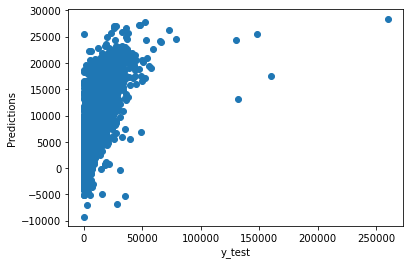

In [123]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [124]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 3402.2471539778667
MSE: 42293850.20954573
RMSE: 6503.372218283814


## K Fold cross validation to measure accuracy of our LinearRegression model.

In [125]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 
cv = ShuffleSplit(n_splits=5, test_size=0.02, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.41996898, 0.12128204, 0.20055529, 0.15682335, 0.28066839])

In [126]:
print(lr.coef_)
print(lr.intercept_)

[ 5.86469120e+01  1.94014808e+02  5.19292650e+00 -8.04145849e-02
 -1.23525860e+03 -3.94841076e+03 -9.51793856e+02  3.12083816e+03
  4.77210009e+03 -3.39410194e+03 -1.33242093e+03 -9.29656203e+02
  2.66344544e+03 -8.51818801e+02  2.15776352e+03 -1.30594472e+03
 -9.62989514e+02 -1.15371359e+03 -1.05761821e+03  1.45396453e+03
  3.18463687e+03  2.83311932e+02 -1.74759202e+03]
-370754.9129359959


In [127]:
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((predictions - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lr_coefficient = pd.DataFrame() 
lr_coefficient["Columns"] = X_train.columns 
lr_coefficient['Coefficient Estimate'] = pd.Series(lr.coef_) 
print(lr_coefficient) 

Mean squared Error on test set :  42293850.20954564
                    Columns  Coefficient Estimate
0                    abtest             58.646912
1                  year_reg            194.014808
2                  power_ps              5.192927
3                 kilometer             -0.080415
4                  repaired          -1235.258601
5        vehicle_type_Other          -3948.410755
6          vehicle_type_bus           -951.793856
7       vehicle_type_cabrio           3120.838160
8        vehicle_type_coupe           4772.100087
9   vehicle_type_kleinwagen          -3394.101940
10       vehicle_type_kombi          -1332.420935
11   vehicle_type_limousine           -929.656203
12         vehicle_type_suv           2663.445441
13            gearbox_Other           -851.818801
14        gearbox_automatik           2157.763518
15          gearbox_manuell          -1305.944717
16          fuel_type_Other           -962.989514
17         fuel_type_benzin          -1153.71358

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

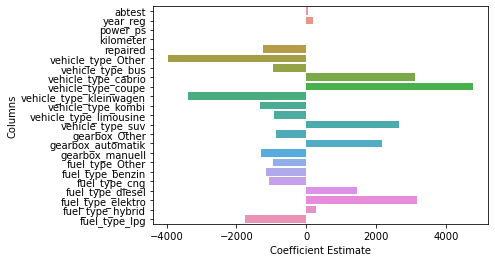

In [128]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lr_coefficient,orient='h')

# Ridge Regression

In [74]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 


In [75]:
# Train the model 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(X_train, y_train) 
y_pred = ridgeR.predict(X_test) 

In [76]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.4199695484992648

In [77]:
ridgeR.score(X_train, y_train)
ridgeR.score(X_test, y_test)


0.4199695484992648

In [78]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 


42293808.906704664


In [79]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


                    Columns  Coefficient Estimate
0                    abtest             58.647686
1                  year_reg            194.008667
2                  power_ps              5.193017
3                 kilometer             -0.080416
4                  repaired          -1235.280009
5        vehicle_type_Other          -3947.920223
6          vehicle_type_bus           -951.656677
7       vehicle_type_cabrio           3120.589483
8        vehicle_type_coupe           4771.621298
9   vehicle_type_kleinwagen          -3393.885048
10       vehicle_type_kombi          -1332.282122
11   vehicle_type_limousine           -929.551767
12         vehicle_type_suv           2663.085056
13            gearbox_Other           -851.681804
14        gearbox_automatik           2157.732315
15          gearbox_manuell          -1306.050510
16          fuel_type_Other           -951.805873
17         fuel_type_benzin          -1142.452500
18            fuel_type_cng          -1042.279041


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

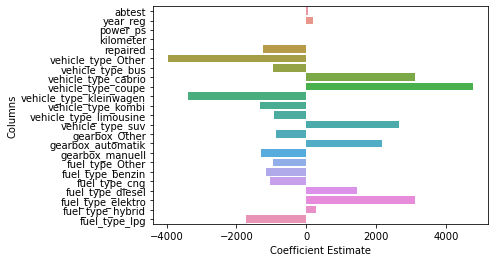

In [80]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

# Lasso Regression

In [81]:
from sklearn.linear_model import Lasso 

In [82]:
# Train the model 
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5536839367.675781, tolerance: 4338341382.279536
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [83]:
y_pred1 = lasso.predict(X_test) 


In [84]:
lasso.score(X_train, y_train)
lasso.score(X_test, y_test)


0.41995597347088787

In [85]:
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 


Mean squared error on test set 42294798.7506941


In [86]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

                    Columns  Coefficient Estimate
0                    abtest             58.262907
1                  year_reg            193.997396
2                  power_ps              5.193263
3                 kilometer             -0.080427
4                  repaired          -1235.204282
5        vehicle_type_Other          -3017.102170
6          vehicle_type_bus            -20.875272
7       vehicle_type_cabrio           4049.071665
8        vehicle_type_coupe           5700.244317
9   vehicle_type_kleinwagen          -2463.476918
10       vehicle_type_kombi           -401.790773
11   vehicle_type_limousine              0.158052
12         vehicle_type_suv           3590.902698
13            gearbox_Other             -0.000000
14        gearbox_automatik           3010.281481
15          gearbox_manuell           -453.972943
16          fuel_type_Other          -1026.239966
17         fuel_type_benzin          -1217.636589
18            fuel_type_cng          -1058.014667


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

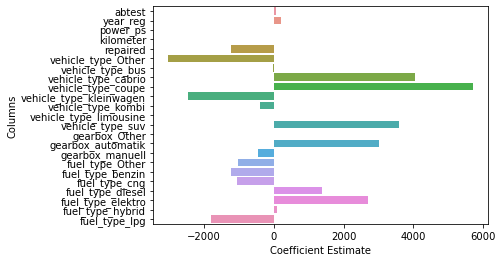

In [87]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

#  Random Forest Regressor


In [129]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)


RandomForestRegressor()

In [130]:
y_pred = random_reg.predict(X_test)


In [131]:
random_reg.score(X_train, y_train)
random_reg.score(X_test, y_test)


0.844878790276183

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

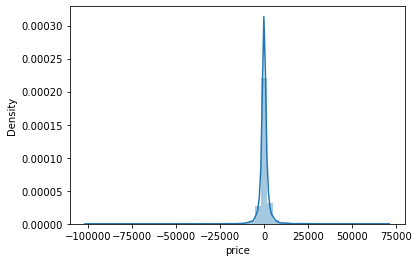

In [132]:
sns.distplot(y_test-y_pred)


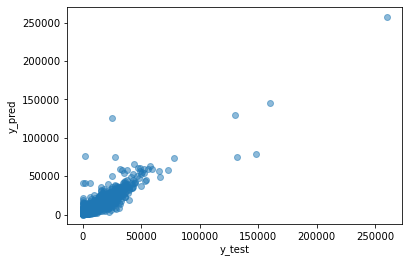

In [133]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1513.3340703361434
MSE: 11310900.633684495
RMSE: 3363.1682434401782


# XGB regressor model

In [92]:
brew install libomp

SyntaxError: invalid syntax (<ipython-input-92-6502e8fc9f2e>, line 1)

In [94]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score

In [95]:
xgb_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg.fit(X_train, y_train)


[21:41:25] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=75, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.75, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [96]:
predictions = xgb_reg.predict(X_test)


In [97]:
xgb_reg.score(X_train, y_train)
xgb_reg.score(X_test, y_test)


0.761095507831534

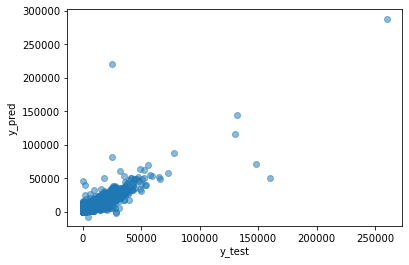

In [98]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [99]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 1681.568480750872
MSE: 17420087.01885129
RMSE: 4173.7377755258285


In [100]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [101]:

import seaborn as sns

import ppscore as pps


In [102]:
matrix = pps.matrix(Autos5_new)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/s

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/s

In [103]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,price,price,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,price,abtest,0.000000,regression,True,mean absolute error,0.4836,0.494965,DecisionTreeRegressor()
2,price,year_reg,0.175891,regression,True,mean absolute error,5.4782,4.514635,DecisionTreeRegressor()
3,price,power_ps,0.000000,regression,True,mean absolute error,51.8272,53.383023,DecisionTreeRegressor()
4,price,model,0.015877,classification,True,weighted F1,0.0236,0.039102,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
724,kilometer_Bin,fuel_type_diesel,0.000000,regression,True,mean absolute error,0.2966,0.411115,DecisionTreeRegressor()
725,kilometer_Bin,fuel_type_elektro,0.000000,regression,True,mean absolute error,0.0002,0.000396,DecisionTreeRegressor()
726,kilometer_Bin,fuel_type_hybrid,0.000000,regression,True,mean absolute error,0.0010,0.002020,DecisionTreeRegressor()
727,kilometer_Bin,fuel_type_lpg,0.000000,regression,True,mean absolute error,0.0174,0.033949,DecisionTreeRegressor()


In [104]:
pps.score(Autos5_new, "year_reg", "price")
 

{'x': 'year_reg',
 'y': 'price',
 'ppscore': 0.2763384521859593,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 3367.8463063871204,
 'model': DecisionTreeRegressor()}

In [105]:
pps.score(Autos5_new, "kilometer", "price")
 

{'x': 'kilometer',
 'y': 'price',
 'ppscore': 0.02481984976484153,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 4538.387975638953,
 'model': DecisionTreeRegressor()}

In [106]:
pps.score(Autos5_new, "power_ps", "price")
 

{'x': 'power_ps',
 'y': 'price',
 'ppscore': 0.18882598737157108,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 3775.1203038494073,
 'model': DecisionTreeRegressor()}

In [107]:
pps.score(Autos5_new, "repaired", "price")
 

{'x': 'repaired',
 'y': 'price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 4926.094022306919,
 'model': DecisionTreeRegressor()}

In [108]:
pps.score(Autos5_new, "abtest", "price")
  

{'x': 'abtest',
 'y': 'price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 5175.952322872316,
 'model': DecisionTreeRegressor()}

In [109]:
pps.score(Autos5_new, "gearbox_manuell", "price")
 

{'x': 'gearbox_manuell',
 'y': 'price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 4897.260620379204,
 'model': DecisionTreeRegressor()}

In [110]:
pps.score(Autos5_new, "vehicle_type_coupe", "price")
 

{'x': 'vehicle_type_coupe',
 'y': 'price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 4653.897,
 'model_score': 5117.252274511611,
 'model': DecisionTreeRegressor()}

In [111]:
Autos6 = Autos5_new[['price','year_reg','power_ps']]
Autos6

,price,year_reg,power_ps
0,18300,2011,190
1,9800,2004,163
2,1500,2001,75
3,3600,2008,69
4,650,1995,102
...,...,...,...
330415,3200,2004,225
330416,1199,2000,101
330417,9200,1996,102
330418,3400,2002,100


In [112]:
X_pps = Autos6[['year_reg','power_ps']]
y_pps = Autos6['price'] 

In [113]:
from sklearn.model_selection import train_test_split
X_train_pps, X_test_pps, y_train_pps, y_test_pps = train_test_split(X_pps,y_pps,test_size=0.02,random_state=0) 

In [114]:
xgb_reg_pps = xgb.XGBRegressor(objective="reg:linear", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg_pps.fit(X_train_pps, y_train_pps)


[21:42:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=75, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.75, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [115]:
predictions_pps = xgb_reg_pps.predict(X_test_pps)


In [116]:
xgb_reg_pps.score(X_train_pps, y_train_pps)
xgb_reg_pps.score(X_test_pps, y_test_pps)


0.6836500720258503

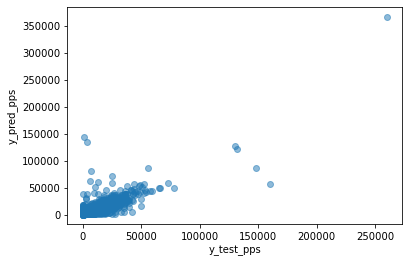

In [117]:
plt.scatter(y_test_pps, predictions_pps, alpha = 0.5)
plt.xlabel("y_test_pps")
plt.ylabel("y_pred_pps")
plt.show()


In [118]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_pps, predictions_pps))
print('MSE:', metrics.mean_squared_error(y_test_pps, predictions_pps))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_pps, predictions_pps)))


MAE: 2030.1376800006087
MSE: 23067139.60753403
RMSE: 4802.826210423819


# Neural networks Regression

In [259]:
from keras.models import Sequential
from keras.layers import Dense


In [260]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=25, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [261]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [262]:
model.fit(X_train, y_train,epochs= 100, batch_size=10)

Epoch 1/100
32382/32382 [==============================] - 66s 2ms/step - loss: 6175.5059 - mean_absolute_error: 6175.5059
Epoch 2/100
32382/32382 [==============================] - 64s 2ms/step - loss: 6175.5161 - mean_absolute_error: 6175.5161
Epoch 3/100
32382/32382 [==============================] - 65s 2ms/step - loss: 6175.5171 - mean_absolute_error: 6175.5171
Epoch 4/100
32382/32382 [==============================] - 63s 2ms/step - loss: 6175.4858 - mean_absolute_error: 6175.4858
Epoch 5/100
32382/32382 [==============================] - 65s 2ms/step - loss: 6175.4941 - mean_absolute_error: 6175.4941
Epoch 6/100
32382/32382 [==============================] - 83s 3ms/step - loss: 6175.5063 - mean_absolute_error: 6175.5063
Epoch 7/100
32382/32382 [==============================] - 65s 2ms/step - loss: 6175.5205 - mean_absolute_error: 6175.5205
Epoch 8/100
32382/32382 [==============================] - 64s 2ms/step - loss: 6175.4810 - mean_absolute_error: 6175.4810
Epoch 9/100
3238

In [263]:
y_pred = model.predict(X_test)


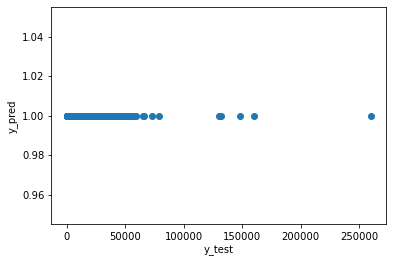

In [268]:
plt.scatter(y_test, y_pred )
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [269]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 6082.468149493116
MSE: 109912457.37116054
RMSE: 10483.914219944789


# Decision Tree Regression

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
Autos7 = Autos5_new.drop(['model','brand','kilometer_Bin'],axis=1)
Autos7

,price,abtest,year_reg,power_ps,kilometer,repaired,vehicle_type_Other,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,...,gearbox_Other,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg
0,18300,1,2011,190,125000,2,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,9800,1,2004,163,125000,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1500,1,2001,75,150000,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,3600,1,2008,69,90000,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,650,1,1995,102,150000,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330415,3200,0,2004,225,150000,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
330416,1199,1,2000,101,125000,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
330417,9200,1,1996,102,150000,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
330418,3400,1,2002,100,150000,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [121]:
array = Autos7.values
X = array[:,1:25]
y = array[:,0]   

In [122]:
X

array([[   1, 2011,  190, ...,    0,    0,    0],
       [   1, 2004,  163, ...,    0,    0,    0],
       [   1, 2001,   75, ...,    0,    0,    0],
       ...,
       [   1, 1996,  102, ...,    0,    0,    0],
       [   1, 2002,  100, ...,    0,    0,    0],
       [   0, 2013,  320, ...,    0,    0,    0]])

In [123]:
X.shape

(330420, 23)

In [124]:
y

array([18300,  9800,  1500, ...,  9200,  3400, 28990])

In [125]:
y.shape

(330420,)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03,random_state=0)  

In [127]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [128]:
#Find the accuracy
model.score(X_test,y_test)

0.7370627104179068

# KNN regression model

In [129]:
from sklearn.neighbors import KNeighborsRegressor 

In [130]:
knn_model = KNeighborsRegressor(n_neighbors=5) 

In [131]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [132]:
y_pred = knn_model.predict(X_test)


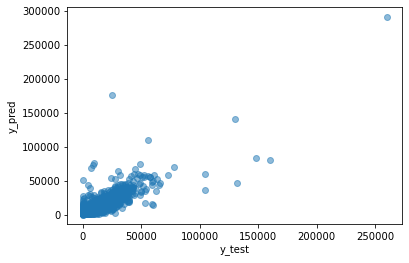

In [133]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [134]:
#Find the accuracy
knn_model.score(X_test,y_test)

0.7761189155769447

In [135]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
 

MAE: 1673.2993644708965
MSE: 15565418.640334912
RMSE: 3945.3033648041455


# our final model will be Random forest Regressor model as it has least RMSE value

In [135]:
Autos5_new

,price,abtest,year_reg,power_ps,model,kilometer,brand,repaired,vehicle_type_Other,vehicle_type_bus,...,gearbox_automatik,gearbox_manuell,fuel_type_Other,fuel_type_benzin,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg,kilometer_Bin
0,18300,1,2011,190,Other,125000,audi,2,0,0,...,0,1,0,0,0,1,0,0,0,g
1,9800,1,2004,163,grand,125000,jeep,1,0,0,...,1,0,0,0,0,1,0,0,0,g
2,1500,1,2001,75,golf,150000,volkswagen,0,0,0,...,0,1,0,1,0,0,0,0,0,h
3,3600,1,2008,69,fabia,90000,skoda,0,0,0,...,0,1,0,0,0,1,0,0,0,e
4,650,1,1995,102,3er,150000,bmw,2,0,0,...,0,1,0,1,0,0,0,0,0,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330415,3200,0,2004,225,leon,150000,seat,2,0,0,...,0,1,0,1,0,0,0,0,0,h
330416,1199,1,2000,101,fortwo,125000,smart,0,0,0,...,1,0,0,1,0,0,0,0,0,g
330417,9200,1,1996,102,transporter,150000,volkswagen,0,0,1,...,0,1,0,0,0,1,0,0,0,h
330418,3400,1,2002,100,golf,150000,volkswagen,1,0,0,...,0,1,0,0,0,1,0,0,0,h


In [136]:
file_name = 'cleaned_autos.xlsx' 
# saving the excel
Autos5_new.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [137]:
X = Autos5_new.drop(['price','model','brand','kilometer_Bin'],axis=1)
y = Autos5_new['price'] 

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.02,random_state=0) 

In [139]:
final_model = random_reg

In [140]:
pred_y=final_model.predict(X_test)
pred_y

array([12477.87130952,  9185.28723176,  8482.8325    , ...,
        1865.15577036,  1639.18377067,  2753.76166414])

In [141]:
final_model.score(X_test,y_test)



0.844878790276183

In [142]:
from sklearn import metrics
print('Final_MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('Final_MSE:', metrics.mean_squared_error(y_test, pred_y))
print('Final_RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
 

Final_MAE: 1513.3340703361434
Final_MSE: 11310900.633684495
Final_RMSE: 3363.1682434401782


In [92]:
import pickle
pickle_out = open('new_model.pkl','wb')
pickle.dump(final_model,pickle_out)#saving our model in .pkl file 
pickle_out.close()